In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as LA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [10]:
data = pd.read_csv('C:\\Users\\priya sinha\\Desktop\\Dataset\\iris.csv')

In [11]:
data

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [12]:
data1 = pd.DataFrame(data)
data2= data1.drop('Species', axis=1)

In [18]:
train_data, test_data = train_test_split( data2, train_size = 0.5, random_state=42)
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)

C:\Users\priya sinha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
cov_1= np.cov(train_data,rowvar=False)

In [20]:
cov_1

array([[ 1.01351351,  0.70006066, -0.30944885,  0.88220453,  0.89143101],
       [ 0.70006066,  1.01351351, -0.03265999,  0.87178073,  0.79832092],
       [-0.30944885, -0.03265999,  1.01351351, -0.33413599, -0.24890888],
       [ 0.88220453,  0.87178073, -0.33413599,  1.01351351,  0.96766947],
       [ 0.89143101,  0.79832092, -0.24890888,  0.96766947,  1.01351351]])

In [21]:
e_values, e_vectors = LA.eigh(cov_1)

In [22]:
e_values

array([0.02241862, 0.1144696 , 0.27464958, 0.99722543, 3.65880434])

In [23]:
e_vectors

array([[ 0.01906821, -0.6039091 ,  0.6308993 ,  0.04028476, -0.48504991],
       [ 0.27505   , -0.3666549 , -0.68773822, -0.33182067, -0.45477782],
       [-0.12672357,  0.05899058,  0.25541822, -0.94040211,  0.17568906],
       [-0.80278587,  0.2678539 , -0.11838515, -0.00420511, -0.5193808 ],
       [ 0.51328343,  0.65240508,  0.22299934, -0.06243685, -0.50722842]])

In [25]:
g=[]
e_1=[]
x=np.matrix(train_data)
for i in range(1,5):
    g.append(e_vectors[-i])
    pc=np.matrix(g)
    x_bar= (pc.T.dot(pc.dot(train_data.T))).T
    error =np.linalg.norm(x_bar-x)
    e_1.append(error)
print(e_1)

[18.567343247107974, 16.10384572567789, 13.800221932752303, 10.614438695794874]


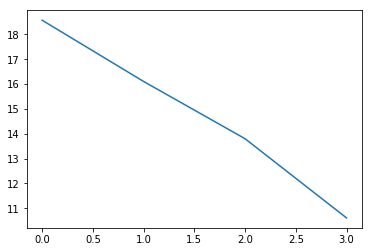

In [26]:
plt.plot([j for j in range(len(g))],e_1)